In [60]:
import pandas as pd 
import numpy as np

def create_price_dataset(items, num_days=365, start_price_range=(10, 100), volatility=0.1):

    data = []
    dates = pd.date_range(start='2023-01-01', periods=num_days)

    for item in items:
        price = np.random.uniform(start_price_range[0], start_price_range[1])
        for date in dates:
            price_change = np.random.normal(0, volatility * price)
            price += price_change
            price = max(0, price) 
            data.append([item, price, date])

    df = pd.DataFrame(data, columns=['item', 'price', 'date'])
    return df

items = [ "estrogen", "progesterone", "gnhr analogue", "catnip", "cat", "kitten", "dog" ]

df = create_price_dataset(items)
df

,item,price,date
0,estrogen,14.958781,2023-01-01
1,estrogen,15.133998,2023-01-02
2,estrogen,16.810359,2023-01-03
3,estrogen,13.832146,2023-01-04
4,estrogen,16.005894,2023-01-05
...,...,...,...
2550,dog,56.503690,2023-12-27
2551,dog,56.065346,2023-12-28
2552,dog,57.897284,2023-12-29
2553,dog,58.596271,2023-12-30


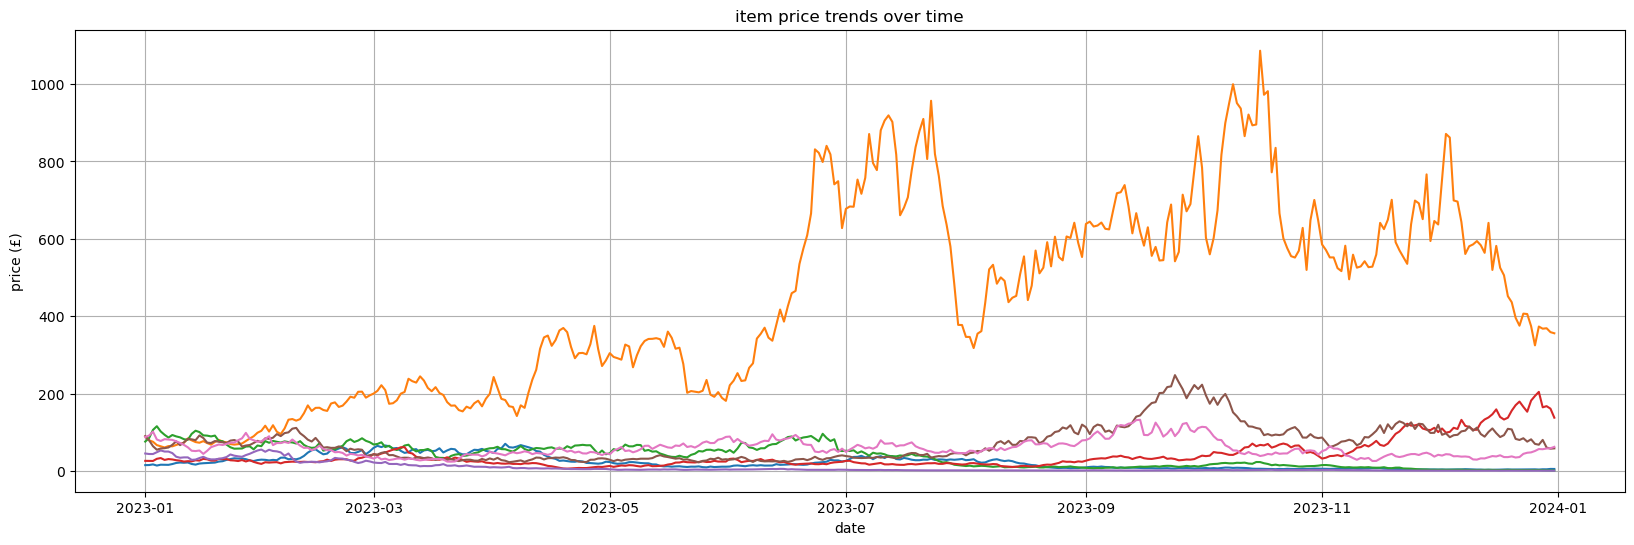

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
for item in df['item'].unique():
    item_data = df[df['item'] == item]
    plt.plot(item_data['date'], item_data['price'], label=item)

plt.xlabel('date')
plt.ylabel('price (£)')
plt.title('item price trends over time')
plt.grid(True)
plt.show()

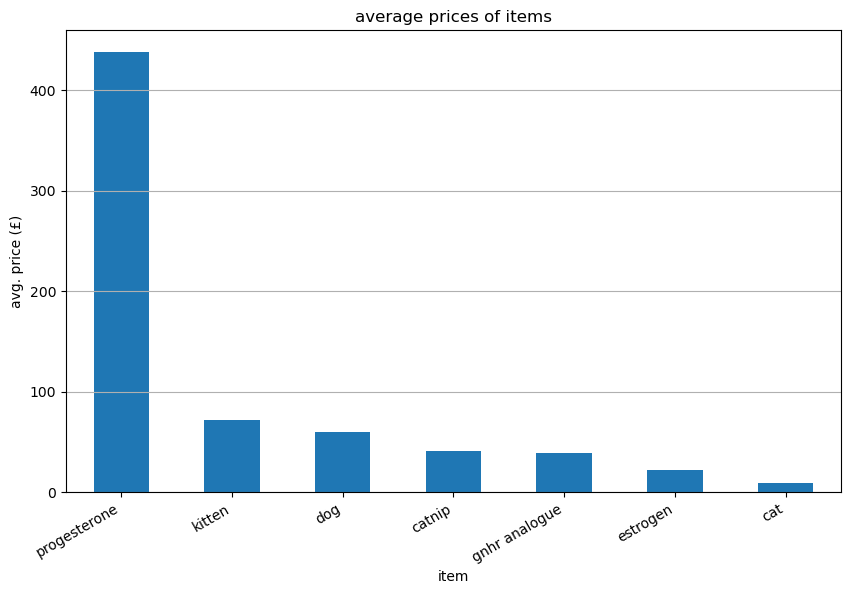

In [67]:
average_prices = df.groupby('item')['price'].mean().sort_values(ascending=False)
average_prices

fig = plt.subplots(figsize=(10, 6))
average_prices.plot(kind='bar')
plt.title("average prices of items")
plt.xlabel("item")
plt.ylabel("avg. price (£)")
plt.xticks(rotation=30, ha="right")
plt.grid(axis='y', linestyle='-')
plt.show()

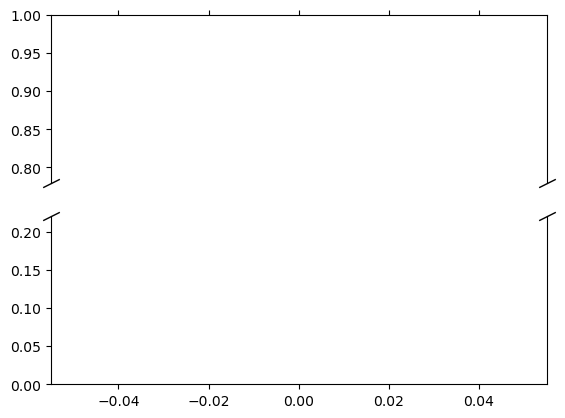

In [77]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(kind='bar', data=average_prices)
ax2.plot(kind='bar', data=average_prices)


ax1.set_ylim(.78, 1.)  # outliers only
ax2.set_ylim(0, .22)  # most of the data

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)


plt.show()